Used Car Prediction

In this notebook, there are datas about many cars with different spesification and brands. All the datas which is included are categorical and numerical variables, so then we'll need to do some data preprocessing parts for that. As long as we are facing the regresion problem, we will find and make the best models that could predict the most appropriate price for each cars

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

Importing Train Dataset

Since the data is in csv type of file, we only have to use pd.read_csv for importing the data,

In [2]:
train = pd.read_csv("C:/Users/vijay.N/Downloads/train-data.csv")

Data Description
1. Exploring car spesifications data

In [3]:
train.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [5]:
train.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


2. Checking Missing Values
Make a function for presenting total number and percentages of missing values in our data

In [6]:
#function for presenting total number and percentages of missing values 
missing_data = pd.DataFrame({'Total_Missing': train.isnull().sum(), '%': (train.isnull().sum()/train.shape[0])*100})
missing_data

,Total_Missing,%
Unnamed: 0,0,0.000000
Name,0,0.000000
Location,0,0.000000
Year,0,0.000000
Kilometers_Driven,0,0.000000
Fuel_Type,0,0.000000
Transmission,0,0.000000
Owner_Type,0,0.000000
Mileage,2,0.033228
Engine,36,0.598106


"New_Price" columns has more than 85% of missing values inside it, we will drop it later.

Exploratory Data Analysis (EDA) and Feature Engineering
Before we start, I just want you to know that we will do the feature engineering between train and test dataset seperately. So, it will prevent Data Leakage problem. \ Okay, let's get started:

**Converting some indefinitive data and clearing units**
**Handling Missing Values**
**Handling Categorical Data**
**Determining Feature Importance**
1. Converting some indefinitive data and clearing units
'Name' column has the car spesific name inside it. This columns may have some value that can be extracted to build our model later. But, we have to make it more general by only using the first( **brand name**) word of its sentence. We can do it by using the help of Regular Expression.

In [7]:
import re
#function for extracting first word of the car's name
def brand_and_model(car):
    car_patterns = re.compile('^(\S+)', flags = re.IGNORECASE) #extract the first word in car's name 
    cars = car_patterns.match(car)
    return cars.group(1) 
train['Brand'] = list(train['Name'].map(brand_and_model))      #make a column with a name 'Brand'
train.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,Maruti
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,Hyundai
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,Honda
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,Maruti
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,Audi


Mileage columns has different unit in it which is:

**km/kg (*kilometer per kilogram*)**
**kmpl (*kilometer per liter*)**
As long as the gas density of natural gas is somewhere 0.712 kg/m^3, we will have the relationship: 1 liter = +- 712 grams \ then we can convert km/kg to kmpl by the factor of 1/0.712 = 1.40

In [8]:
#function for converting km/kg to kmpl 
def mileage_converter(column, data):
    New_Mileage = []                            #list to accomodate a new mileage that has been converted
    for mileage in data[column]:                
        if str(mileage).endswith('km/kg'):      #accessing each km/kg in its column
            mileage = mileage[:-6]
            mileage = float(mileage)*1.40       #converting km/kg to kmpl with 1.40 factor
            New_Mileage.append(float(mileage))  #append it to New_Mileage list
        elif str(mileage).endswith('kmpl'):     #accessing each kmpl in its column
            mileage = mileage[:-6]
            New_Mileage.append(float(mileage))  #append it to New_Mileage list
        else:
            New_Mileage.append(np.nan)          #appending nan values to New_Mileage list
    data['New_Mileage'] = New_Mileage           #Making new column in dataframe

mileage_converter('Mileage', train)
train.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,New_Mileage
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,Maruti,37.24
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,Hyundai,19.60
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,Honda,18.00
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,Maruti,20.70
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,Audi,15.00


For other columns that has unit inside it, we can remove those units.

In [9]:
#Clearing units in Engine and Power column
train['Engine']=train.Engine.str.replace('CC','')                   
train['Power']=train.Power.str.replace('bhp','')
train['Engine'] = pd.to_numeric(train['Engine'], errors='coerce')
train['Power'] = pd.to_numeric(train['Power'], errors='coerce')

train.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,New_Mileage
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998.0,58.16,5.0,NaN,1.75,Maruti,37.24
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582.0,126.20,5.0,NaN,12.50,Hyundai,19.60
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199.0,88.70,5.0,8.61 Lakh,4.50,Honda,18.00
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248.0,88.76,7.0,NaN,6.00,Maruti,20.70
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968.0,140.80,5.0,NaN,17.74,Audi,15.00


Let's drop some of our unnecessary columns and columns that we have already converted before:

**Unnecessary columns ->> (Unnamed: 0 and New_Price)**
**Converted columns ->> (Mileage, Name)**


In [10]:
train.drop(['Unnamed: 0', 'Name', 'Mileage', 'New_Price' ], axis=1, inplace=True)
train.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Seats,Price,Brand,New_Mileage
0,Mumbai,2010,72000,CNG,Manual,First,998.0,58.16,5.0,1.75,Maruti,37.24
1,Pune,2015,41000,Diesel,Manual,First,1582.0,126.20,5.0,12.50,Hyundai,19.60
2,Chennai,2011,46000,Petrol,Manual,First,1199.0,88.70,5.0,4.50,Honda,18.00
3,Chennai,2012,87000,Diesel,Manual,First,1248.0,88.76,7.0,6.00,Maruti,20.70
4,Coimbatore,2013,40670,Diesel,Automatic,Second,1968.0,140.80,5.0,17.74,Audi,15.00


2. Handling Missing Values
After dropping unnecessary columns, we still have some missing values.

In [11]:
missing_data = pd.DataFrame({'Total_Missing': train.isnull().sum(), '%': (train.isnull().sum()/train.shape[0])*100})
missing_data

,Total_Missing,%
Location,0,0.000000
Year,0,0.000000
Kilometers_Driven,0,0.000000
Fuel_Type,0,0.000000
Transmission,0,0.000000
Owner_Type,0,0.000000
Engine,36,0.598106
Power,143,2.375810
Seats,42,0.697790
Price,0,0.000000


But we have to see how these data in each columns is distributed for finding the right methods of filling the missing values.

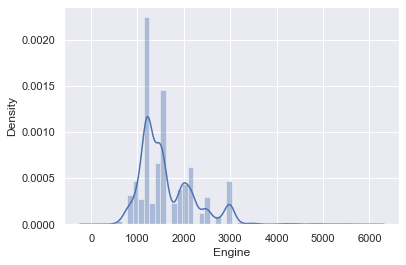

In [12]:
sns.distplot(train.Engine, kde=True);

It's **right-skewed**

<AxesSubplot:xlabel='Power', ylabel='Density'>

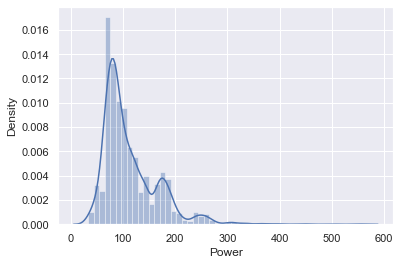

In [13]:
sns.distplot(train.Power, kde=True)

It's **right-skewed**

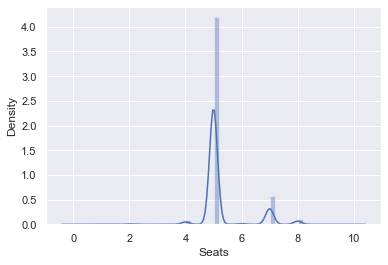

In [14]:
sns.distplot(train.Seats, kde=True);

It's **symmetic** enough, then we can fill each columns now

In [15]:
#We fill with median for right skewed columns and fill with mean for symmetric column
train.Engine.fillna(value=train.Engine.median(), inplace=True)
train.Power.fillna(value=train.Power.median(), inplace=True)
train.Seats.fillna(value=train.Seats.mean(), inplace=True)

#Because New_Mileage only has 0.03% of missing data, we'll fill it with mean
train.New_Mileage.fillna(value=train.New_Mileage.mean(), inplace=True) 
train.isnull().sum()

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Engine               0
Power                0
Seats                0
Price                0
Brand                0
New_Mileage          0
dtype: int64

It's cleaner right now!

3. Cleaning the Outliers in Numerical Data
We can detect the outliers with many different ways, such as:

**Z-Score**
**IQR**
**Percentile**
**and so on..** \ But we will use Z-Score in this case.

In [16]:
num_columns = ['Year', 'Kilometers_Driven', 'Engine', 'Power', 'Seats', 'Price', 'New_Mileage']
#function to cleaning outliers that has a position higher than 3 in z-score
def z_score(column, df):
    treshold = 3                   #our treshold to assume a data point is an outlier                                    
    mean = df[column].mean()       #our mean values in its column
    std  = df[column].std()        #our standard deviation values in its column
    for data in df[column]:
        z_score = (data-mean)/std  #our Z-Score
        
        #conditional for filtering outlier with changing the value with the same number that equal to 3 or -3 in Z-Score
        if z_score>treshold:       
            df.loc[df[column] == data, column] = (treshold*std)+mean 
        elif z_score<-treshold:
            df.loc[df[column] == data, column] = (-treshold*std)+mean 
    return df

for column in num_columns:          #do Z-score funtion to all the numerical columns in train dataset
    z_score(column, train)
    
train.describe()

,Year,Kilometers_Driven,Engine,Power,Seats,Price,New_Mileage
count,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000
mean,2013.374555,57460.396307,1614.621247,112.006363,5.272185,9.118003,17.977264
std,3.212293,35032.211954,574.637848,49.330142,0.761950,9.454641,4.546959
min,2003.548973,171.000000,72.000000,34.200000,2.860699,0.440000,3.326689
25%,2011.000000,34000.000000,1198.000000,78.000000,5.000000,3.500000,15.000000
50%,2014.000000,53000.000000,1493.000000,97.700000,5.000000,5.640000,18.000000
75%,2016.000000,73000.000000,1969.000000,138.030000,5.000000,9.950000,21.000000
max,2019.000000,332544.909914,3419.415594,272.734643,7.696772,43.043220,32.654053


3. Handling Categorical Data
We can find many way for handling categorical data. But categorical data can be qualified into:

**Ordinal Data (Data that has an order)** => **Handle with Label Encoding**
**Nominal Data (Data are'nt in order)** => **Handle with One Hot Encoding**

In [17]:
train['Location'].value_counts()

Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64

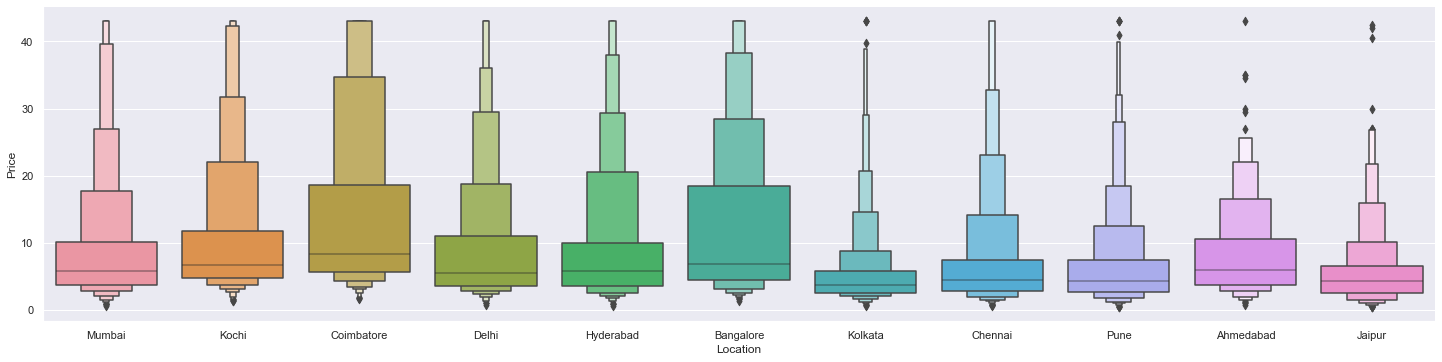

In [18]:
sns.catplot(x = 'Location', y = 'Price', data = train.sort_values('Price', ascending=False), kind='boxen', aspect =4 );

In [19]:
#One Hot Encoding Location column, because it is a Nominal Data
Location = train['Location']
Location = pd.get_dummies(Location, drop_first=True)
Location.head()

,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune
0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0


In [20]:
train['Fuel_Type'].value_counts()

Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

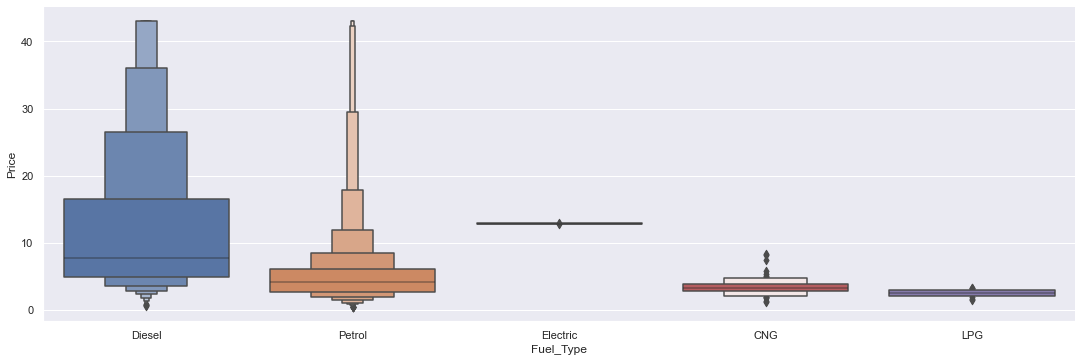

In [21]:
sns.catplot(x = 'Fuel_Type', y = 'Price', data = train.sort_values('Price', ascending=False), kind='boxen', aspect =3 );

In [22]:
#One Hot Encoding Fuel_Type column, because it is a Nominal Data
Fuel_Type = train['Fuel_Type']
Fuel_Type = pd.get_dummies(Fuel_Type, drop_first=True)
Fuel_Type.head()

,Diesel,Electric,LPG,Petrol
0,0,0,0,0
1,1,0,0,0
2,0,0,0,1
3,1,0,0,0
4,1,0,0,0


In [23]:
train['Transmission'].value_counts()

Manual       4299
Automatic    1720
Name: Transmission, dtype: int64

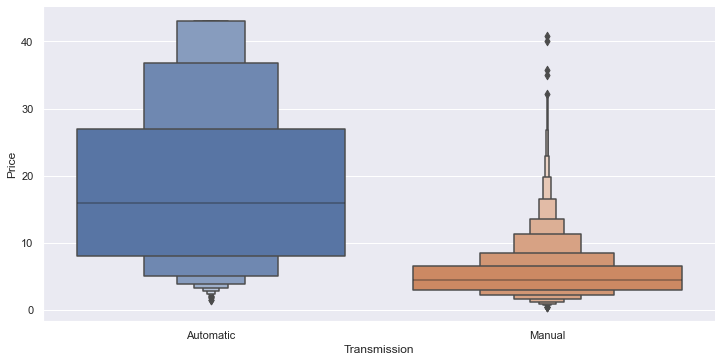

In [24]:
sns.catplot(x = 'Transmission', y = 'Price', data = train.sort_values('Price', ascending=False), kind='boxen', aspect =2 );

In [25]:
#One Hot Encoding Transmission column, because it is a Nominal Data
Transmission = train['Transmission']
Transmission = pd.get_dummies(Transmission, drop_first=True)
Transmission.head()

,Manual
0,1
1,1
2,1
3,1
4,0


In [26]:
train['Owner_Type'].value_counts()

First             4929
Second             968
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64

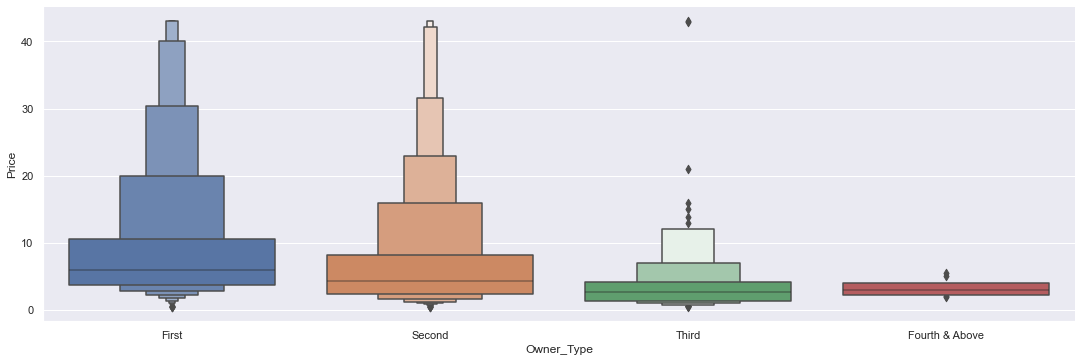

In [27]:
sns.catplot(x = 'Owner_Type', y = 'Price', data = train.sort_values('Price', ascending=False), kind='boxen', aspect = 3);

In [28]:
#Label Encoding Owner_Type column, because it is a Ordinal Data
Owner_Type = train['Owner_Type']

#Every keys that will be replacing the data is based that the newer car owner is having a better status than older car owner
Owner_Type = train['Owner_Type'].map({'First':4, 'Second':3, 'Third':2, 'Fourth & Above':1}).to_frame()
Owner_Type.head()

,Owner_Type
0,4
1,4
2,4
3,4
4,3


In [29]:
train['Brand'].value_counts()

Maruti           1211
Hyundai          1107
Honda             608
Toyota            411
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
BMW               267
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               60
Jaguar             40
Fiat               28
Mitsubishi         27
Mini               26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Bentley             1
Smart               1
Isuzu               1
Lamborghini         1
Ambassador          1
Name: Brand, dtype: int64

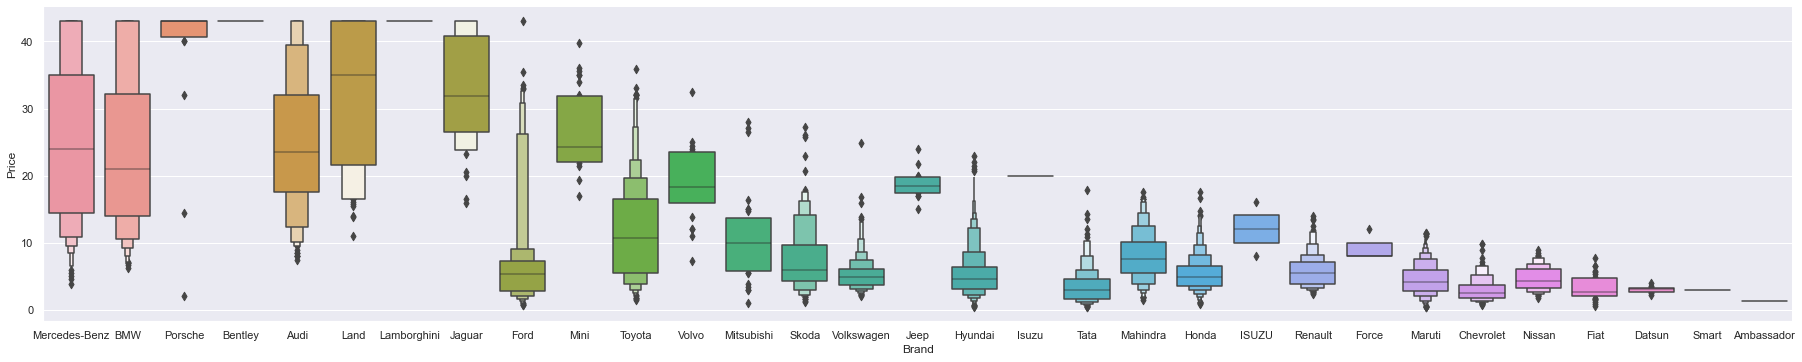

In [30]:
sns.catplot(x = 'Brand', y = 'Price', data = train.sort_values('Price', ascending=False), kind='boxen', aspect = 5);

In [31]:
#One Hot Encoding Brand column, because it is a Nominal Data
Brand = train['Brand']
Brand = pd.get_dummies(Brand, drop_first=True)
Brand.head()

,Audi,BMW,Bentley,Chevrolet,Datsun,Fiat,Force,Ford,Honda,Hyundai,...,Mitsubishi,Nissan,Porsche,Renault,Skoda,Smart,Tata,Toyota,Volkswagen,Volvo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


After handling every categorical columns we will concat them with train data set and drop the old columns

In [32]:
#Concatenating New train dataset ==> train + Location + Fuel_Type + Transmission + Owner_Type + Brand
train = pd.concat([train, Location, Fuel_Type, Transmission, Owner_Type, Brand], axis=1)
train.drop(['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand'], inplace =True, axis=1)

train.head()

,Year,Kilometers_Driven,Engine,Power,Seats,Price,New_Mileage,Bangalore,Chennai,Coimbatore,...,Mitsubishi,Nissan,Porsche,Renault,Skoda,Smart,Tata,Toyota,Volkswagen,Volvo
0,2010.0,72000.0,998.0,58.16,5.0,1.75,32.654053,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015.0,41000.0,1582.0,126.20,5.0,12.50,19.600000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2011.0,46000.0,1199.0,88.70,5.0,4.50,18.000000,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2012.0,87000.0,1248.0,88.76,7.0,6.00,20.700000,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2013.0,40670.0,1968.0,140.80,5.0,17.74,15.000000,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [33]:
train.shape

(6019, 52)

4. Determining Feature Importance
We have to discover the some features that have low correlation with other column, so that we can prevent multicolinearity in each feature data. \ We will use **pearson correlation** => for finding that kind of column. **Heatmap** will help us a lot to visualize the correlation values for each and between columns.

In [34]:
#Seperating Feature and Label column 
y = train['Price']
X = train.drop(["Price"], axis =1) 
X.head()

,Year,Kilometers_Driven,Engine,Power,Seats,New_Mileage,Bangalore,Chennai,Coimbatore,Delhi,...,Mitsubishi,Nissan,Porsche,Renault,Skoda,Smart,Tata,Toyota,Volkswagen,Volvo
0,2010.0,72000.0,998.0,58.16,5.0,32.654053,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015.0,41000.0,1582.0,126.20,5.0,19.600000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2011.0,46000.0,1199.0,88.70,5.0,18.000000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2012.0,87000.0,1248.0,88.76,7.0,20.700000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2013.0,40670.0,1968.0,140.80,5.0,15.000000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


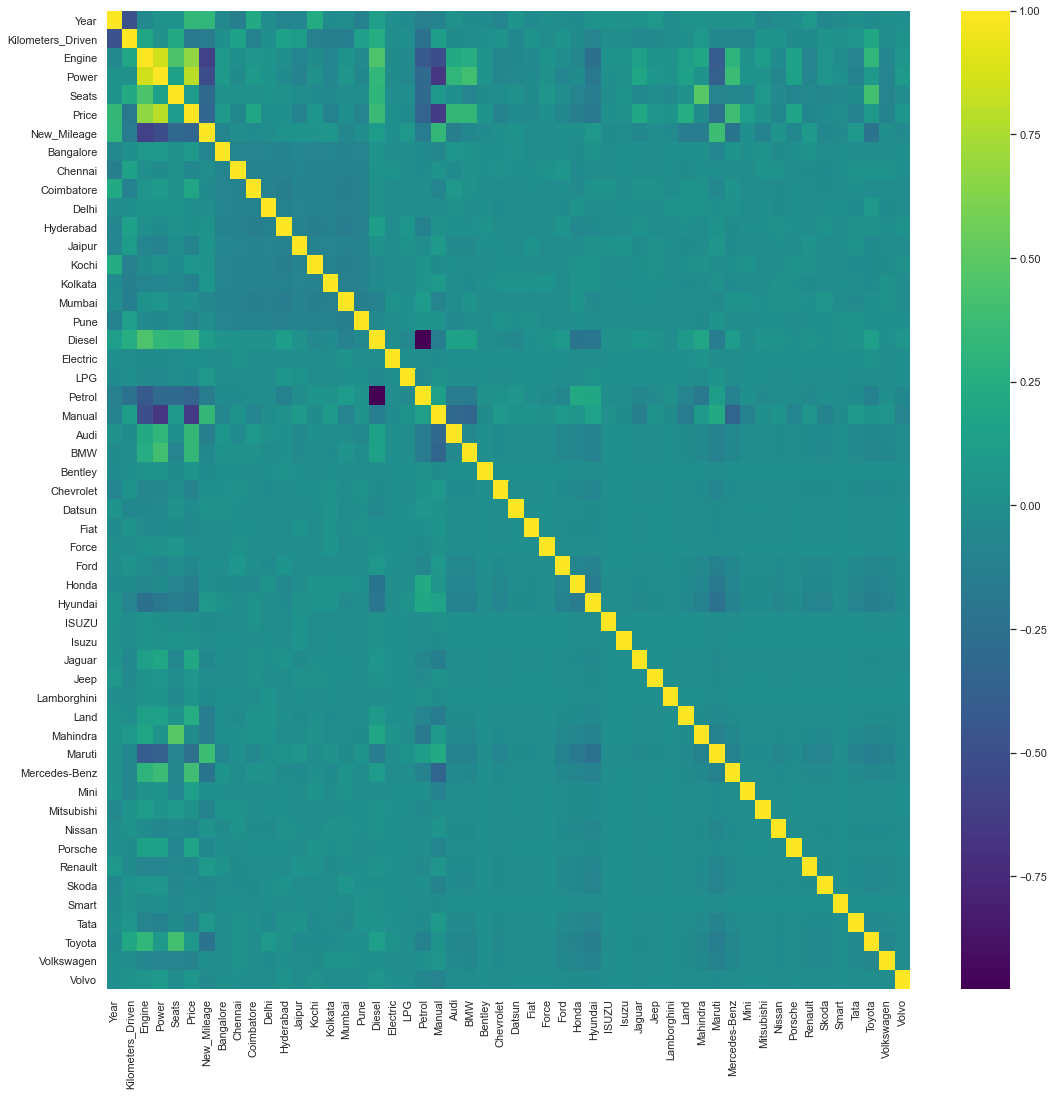

In [35]:
#Visualizing correlation between Feature and Label column 
plt.figure(figsize = (18,18))
sns.heatmap(train.corr(), annot = False, cmap = 'viridis') #WE DON'T USE ANNOT because it will be very chaotic too be seen
plt.show()

In [36]:
#We make a function that will tell us about which column that has correlation values higher than treshold
def column_corr(df):
    treshold = 0.8                           #our treshold
    corr = set()                             #column that have correlation values higher than treshold
    corr_table = df.corr()                   #making correlation matrix of our dataset
    for i in range(len(corr_table.columns)): #acceccing correlation matrix
        for j in range(i):
            #conditional to determine the correlation value is higher than treshold or not
            if abs(corr_table.iloc[i,j])>treshold: 
                column = corr_table.columns[i]
                corr.add(column)
    return corr
print("Columns that has correlation values higher than treshold are "+  str(column_corr(X))+" column.")

Columns that has correlation values higher than treshold are {'Petrol', 'Power'} column.


In [37]:
#dropping that column
X.drop('Petrol', axis=1, inplace =True)
X.head()

,Year,Kilometers_Driven,Engine,Power,Seats,New_Mileage,Bangalore,Chennai,Coimbatore,Delhi,...,Mitsubishi,Nissan,Porsche,Renault,Skoda,Smart,Tata,Toyota,Volkswagen,Volvo
0,2010.0,72000.0,998.0,58.16,5.0,32.654053,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015.0,41000.0,1582.0,126.20,5.0,19.600000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2011.0,46000.0,1199.0,88.70,5.0,18.000000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2012.0,87000.0,1248.0,88.76,7.0,20.700000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2013.0,40670.0,1968.0,140.80,5.0,15.000000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


Importing and Preprocessing Test Dataset

In [38]:
#Importing test dataset (CSV files)
test= pd.read_csv("C:/Users/vijay.N/Downloads/test-data.csv")
test.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [39]:
#A little picture of our test dataset
print(test.info())
print('-'*70)

#-EDA and Feature Engineering-

#Extracting car's brand in "Name" column
test['Brand'] = list(test['Name'].map(brand_and_model))
#Converting km/kg to kmpl in "Mileage" column
mileage_converter('Mileage', test)

#Converting units in 'Engine' and 'Power' columns
test['Engine']=test.Engine.str.replace('CC','')
test['Power']=test.Power.str.replace('bhp','')
test['Engine'] = pd.to_numeric(test['Engine'], errors='coerce')
test['Power'] = pd.to_numeric(test['Power'], errors='coerce')

#Filling missing values in "Engine", "Power", "Seats", and "Mileage" column
test.Engine.fillna(value=train.Engine.median(), inplace=True)
test.Power.fillna(value=train.Power.median(), inplace=True)
test.Seats.fillna(value=train.Seats.mean(), inplace=True)
test.New_Mileage.fillna(value=train.New_Mileage.mean(), inplace=True) 

#Printing the sum of missing values in test dataset
print(test.isnull().sum())
print('-'*70)

#Our numerical column in test dataset
num_columns_test = ['Year', 'Kilometers_Driven', 'Engine', 'Power', 'Seats', 'New_Mileage']

#Eliminating outliers in numerical column with Z-Score
for column in num_columns_test:
    z_score(column, test)
#Description in numerical values in test dataset
print(test.describe())
print('-'*70)

#Handling Categorical Values in our dataset

#One Hot Encoding for Location column
Location_test = pd.get_dummies(test['Location'], drop_first=True)
#One Hot Encoding for Fuel_Type column
Fuel_Type_test = pd.get_dummies(test['Fuel_Type'], drop_first=True)
#One Hot Encoding for Transmission column
Transmission_test = pd.get_dummies(test['Transmission'], drop_first=True)
#Label Encoding for Owner_Type column
Owner_Type_test = test['Owner_Type'].map({'First':4, 'Second':3, 'Third':2, 'Fourth & Above':1}).to_frame()
#One Hot Encoding Brand column
Brand_test = pd.get_dummies(test['Brand'], drop_first=True)

#Concatenating test and new categorical values 
test = pd.concat([test, Location_test, Fuel_Type_test, Transmission_test, Owner_Type_test, Brand_test], axis=1)

#Dropping categorical column that has been handled, New_Price column, unnecessary column, and, column that has high correlation values
test.drop(['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand', 'Unnamed: 0', 'Name', 'Mileage', 'New_Price', 'Petrol'], inplace =True, axis=1)

#New shape of test dataset
print(test.shape)


test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1234 non-null   int64  
 1   Name               1234 non-null   object 
 2   Location           1234 non-null   object 
 3   Year               1234 non-null   int64  
 4   Kilometers_Driven  1234 non-null   int64  
 5   Fuel_Type          1234 non-null   object 
 6   Transmission       1234 non-null   object 
 7   Owner_Type         1234 non-null   object 
 8   Mileage            1234 non-null   object 
 9   Engine             1224 non-null   object 
 10  Power              1224 non-null   object 
 11  Seats              1223 non-null   float64
 12  New_Price          182 non-null    object 
dtypes: float64(1), int64(3), object(9)
memory usage: 125.5+ KB
None
----------------------------------------------------------------------
Unnamed: 0              0
Name   

,Year,Kilometers_Driven,Engine,Power,Seats,New_Mileage,Bangalore,Chennai,Coimbatore,Delhi,...,Mitsubishi,Nissan,OpelCorsa,Porsche,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
0,2014.0,40929.0,998.0,58.20,4.0,31.929854,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2013.0,54493.0,796.0,47.30,5.0,24.000000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2017.0,34000.0,2393.0,147.80,7.0,13.600000,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2012.0,139000.0,1364.0,97.70,5.0,23.500000,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2014.0,29000.0,1197.0,82.85,5.0,18.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Modelling
1. Train Test Split \ 2. Finding the Best Model

Random Forest
Lasso
ElasticNet
3. Hyperparameter Tuning

Before modelling we have to make sure that train and test dataset have the same number of columns,

In [40]:
#We can use inner join for equalizing train and test column
final_X, final_test = X.align(test, join='inner', axis=1)
print(final_X.shape)
print(final_test.shape)
final_test.head()

(6019, 45)
(1234, 45)


,Year,Kilometers_Driven,Engine,Power,Seats,New_Mileage,Bangalore,Chennai,Coimbatore,Delhi,...,Mini,Mitsubishi,Nissan,Porsche,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
0,2014.0,40929.0,998.0,58.20,4.0,31.929854,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2013.0,54493.0,796.0,47.30,5.0,24.000000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2017.0,34000.0,2393.0,147.80,7.0,13.600000,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2012.0,139000.0,1364.0,97.70,5.0,23.500000,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2014.0,29000.0,1197.0,82.85,5.0,18.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


1. Train Test Split


In [41]:
#Train test split train dataset for preventing overfitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_X, y, test_size = 0.25, random_state = 30)

2. Finding the Best Model (Random Forest, Lasso, and Elastic Net)
Random Forest

In [44]:
from sklearn.ensemble import RandomForestRegressor
r_forest = RandomForestRegressor()
r_forest.fit(X_train,y_train)

RandomForestRegressor()

In [43]:
y_result_forest = r_forest.predict(X_test)

This graph is visualizing the difference between our prediction and y_test, and it looks pretty good because it looks just like normal distribution.

<AxesSubplot:xlabel='Price', ylabel='Density'>

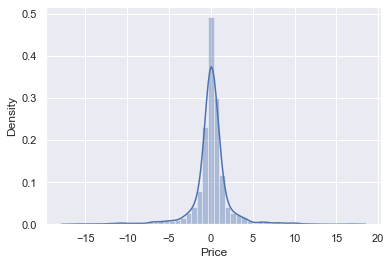

In [45]:
sns.distplot(y_result_forest-y_test, kde=True)

In [46]:
from sklearn import metrics
print("Random Forest accuracy score: ")
print('R-squared training data: ', r_forest.score(X_train, y_train))
print('R-squared test data: ', r_forest.score(X_test, y_test))
print('MAE: ',  metrics.mean_absolute_error(y_test, y_result_forest))
print('MSE: ',  metrics.mean_squared_error(y_test, y_result_forest))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_result_forest)))

Random Forest accuracy score: 
R-squared training data:  0.9891236795477166
R-squared test data:  0.9463453142073759
MAE:  1.2577800168166484
MSE:  5.533013360116255
RMSE:  2.3522358215358117


Lasso

In [47]:
from sklearn.linear_model import Lasso
lasso_model = Lasso()
lasso_model.fit(X_train,y_train)

Lasso()

In [48]:
y_result_lasso = lasso_model.predict(X_test)

<AxesSubplot:xlabel='Price', ylabel='Density'>

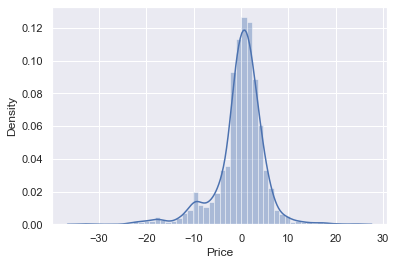

In [49]:
sns.distplot(y_result_lasso-y_test, kde=True)

In [50]:
from sklearn import metrics 
print("Lasso accuracy score: ")
print('R-squared training data: ', lasso_model.score(X_train, y_train))
print('R-squared test data: ', lasso_model.score(X_test, y_test))
print('MAE: ',  metrics.mean_absolute_error(y_test, y_result_lasso))
print('MSE: ',  metrics.mean_squared_error(y_test, y_result_lasso))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_result_lasso)))

Lasso accuracy score: 
R-squared training data:  0.7223017566642393
R-squared test data:  0.7440668307515419
MAE:  3.4295368518432494
MSE:  26.151264255807888
RMSE:  5.113830683138413


Elastic Net

In [51]:
from sklearn.linear_model import ElasticNetCV
ElasticNet = ElasticNetCV()
ElasticNet.fit(X_train,y_train)

ElasticNetCV()

In [52]:
y_result_elasticnet = ElasticNet.predict(X_test)

<AxesSubplot:xlabel='Price', ylabel='Density'>

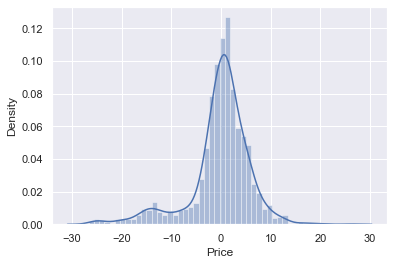

In [53]:
sns.distplot(y_result_elasticnet-y_test, kde=True)

In [54]:
from sklearn import metrics 
print("Elastic Net accuracy score: ")
print('R-squared training data: ', ElasticNet.score(X_train, y_train))
print('R-squared test data: ', ElasticNet.score(X_test, y_test))
print('MAE: ',  metrics.mean_absolute_error(y_test, y_result_elasticnet))
print('MSE: ',  metrics.mean_squared_error(y_test, y_result_elasticnet))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_result_elasticnet)))

Elastic Net accuracy score: 
R-squared training data:  0.6043340605486021
R-squared test data:  0.6264598155134877
MAE:  4.120768080171193
MSE:  38.16835505673269
RMSE:  6.178054309953312


Because **Random Forest** default mode has the highest accuracy score, we will do hyperparameter tuning with that model

3. Hyperparameter Tuning
For doing hyperparameter tuning, we can use:

**RandomizedSearchCV**
**GridSearchCV**
Because RandomizedSearchCV is much faster, we will use it for hyperparameter tuning

In [55]:
from sklearn.model_selection import RandomizedSearchCV

In [56]:
random_parameter = {
    "n_estimators" : [int(x) for x in np.linspace(start=100, stop=1000, num =10)],
    'criterion': ['mse', 'mae'],
    'max_depth' : [int(x) for x in np.linspace(start=2, stop=20, num =10)],
    'min_samples_leaf' : [int(x) for x in np.linspace(start=5, stop=100, num =20)],
    'min_samples_split': [int(x) for x in np.linspace(start=2, stop=10, num =5)],
    'max_features' : ['auto', 'sqrt']
}

In [57]:
hyper_tuning = RandomizedSearchCV(estimator=r_forest, param_distributions=random_parameter, cv=5, n_jobs =-1, scoring = 'neg_root_mean_squared_error', n_iter=10, verbose=3, random_state=42)


In [58]:
hyper_tuning.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [2, 4, 6, 8, 10, 12, 14,
                                                      16, 18, 20],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [5, 10, 15, 20, 25,
                                                             30, 35, 40, 45, 50,
                                                             55, 60, 65, 70, 75,
                                                             80, 85, 90, 95,
                                                             100],
                                        'min_samples_split': [2, 4, 6, 8, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                      

In [ ]:
hyper_tuning.fit(X_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
hyper_tuning.best_params_ 

In [ ]:
hyper_forest = RandomForestRegressor(
     n_estimators= 400,
     min_samples_split= 6,
     min_samples_leaf= 5,
     max_features= 'auto',
     max_depth= 18,
     criterion= 'mse')
hyper_forest.fit(X_train, y_train)

In [ ]:
hyper_result = hyper_forest.predict(X_test)

In [ ]:
sns.distplot(y_test-hyper_result, kde=True)

In [ ]:
print('R-squared training data: ', hyper_forest.score(X_train, y_train))
print('R-squared test data: ', hyper_forest.score(X_test, y_test))
print('MAE: ',  metrics.mean_absolute_error(y_test, hyper_result))
print('MSE: ',  metrics.mean_squared_error(y_test, hyper_result))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, hyper_result)))

In out model, we actually see a decreasing value in every accuracy score after using hyper parameter tuning. It means that our default hyperparameter is much better than the hyperparameter we found in tuning. So we will apply **default Random Forest model** to our test dataset.



Submission for Test Dataset

In [ ]:
test_result = r_forest.predict(final_test)

In [ ]:
submission = pd.DataFrame({'Car_id':test.index,'Price':test_result}) 
submission.head(10)

In [ ]:
filename = 'submission.csv'

submission.to_csv(filename,index=True)

print('Saved file: ' + filename)

Saving the Model

In [ ]:
import pickle
# Make our file
file = open('used-car-pred.pkl', 'wb')

# transfer the information to out pkl file
pickle.dump(r_forest, file)

Conclusion


In this notebook, we analyzes **Used-Car Price Prediction** dataset that have been taken from **Kaggle**. Some model have been evaluated which those are **Lasso**, **ElasticNet**, and **RandomForest**. **RandomForest** give us best accuracy with 98,9% in train model and 94.6% in test model. After doing hyperparameter tuning the default RandomForest accuracy score is much better, So we only used default parameters in that model for our submission.